In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\johir\anaconda3\envs\python_first_practice\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


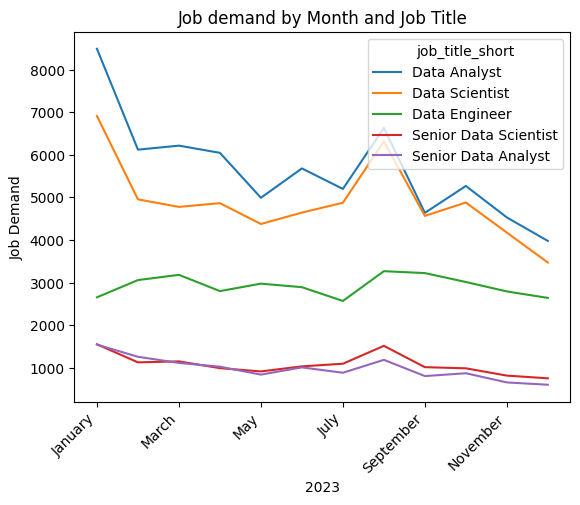

In [ ]:
df_usa = df[df['job_country'] == 'United States'].copy()
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')

df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_usa_pivot.reset_index(inplace=True)

df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month

df_usa_pivot.sort_values('month_no', inplace=True)
df_usa_pivot.set_index('job_posted_month', inplace=True)
df_usa_pivot.drop(columns='month_no', inplace=True)

top_5 = df_usa['job_title_short'].value_counts().head(5)
top_5 = top_5.index.tolist()

df_usa_pivot[top_5].plot(kind='line')
plt.ylabel('Job Demand')
plt.xlabel('2023')
plt.title('Job demand by Month and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()
